In [1]:
from fitparse import FitFile

In [2]:
f = FitFile('../data/20180311 toertocht bertem.fit')

In [3]:
l = list(f.get_messages(as_dict=False))

In [4]:
m = l[0]


In [5]:
m.mesg_type

<MessageType: file_id (#0)>

In [6]:
from collections import defaultdict
import re
import pandas as pd
%matplotlib inline

In [7]:
import folium
import altair as alt

In [8]:
d = defaultdict(list)

pat = re.compile('<MessageType: (\w+) \(#\d+\)>')
for m in f.messages:
    d[pat.match(str(m.mesg_type))[1]].append(m)
d

defaultdict(list,
            {'activity': [<DataMessage: activity (#34) -- local mesg: #8, fields: [timestamp: 2018-03-11 10:51:40, total_timer_time: 8241.0, local_timestamp: None, num_sessions: 1, type: manual, event: activity, event_type: stop, event_group: None]>],
             'device_info': [<DataMessage: device_info (#23) -- local mesg: #3, fields: [timestamp: 2018-03-11 08:34:15, serial_number: None, cum_operating_time: None, product_name: Macro GPS, manufacturer: lezyne, product: 5, software_version: 15.93, battery_voltage: 3.98828125, device_index: 5, device_type: 2, hardware_version: None]>,
              <DataMessage: device_info (#23) -- local mesg: #3, fields: [timestamp: 2018-03-11 08:34:15, serial_number: None, cum_operating_time: None, product_name: None, manufacturer: None, product: None, software_version: None, battery_voltage: None, device_index: 1, device_type: environment_sensor_legacy, hardware_version: None]>,
              <DataMessage: device_info (#23) -- loc

In [9]:
{k: len(v) for k,v in d.items()}

{'activity': 1,
 'device_info': 3,
 'event': 3,
 'file_creator': 1,
 'file_id': 1,
 'lap': 1,
 'record': 8283,
 'session': 1,
 'timestamp_correlation': 1}

In [10]:
d['record'][0]

<DataMessage: record (#20) -- local mesg: #5, fields: [timestamp: 2018-03-11 08:34:16, position_lat: 606832106, position_long: 55201525, distance: 0.0, accumulated_power: None, enhanced_altitude: 39.0, altitude: 39.0, enhanced_speed: 0.0, speed: 0.0, power: None, grade: None, calories: 0, heart_rate: 110, cadence: None, temperature: 17, left_right_balance: None, left_torque_effectiveness: None, right_torque_effectiveness: None, left_pedal_smoothness: None, right_pedal_smoothness: None]>

In [11]:
m = d[ 'record'][0]


In [12]:
m2 = (m.def_mesg)
m2

<DefinitionMessage: record (#20) -- local mesg: #5, field defs: [timestamp, position_lat, position_long, distance, accumulated_power, altitude, speed, power, grade, calories, heart_rate, cadence, temperature, left_right_balance, left_torque_effectiveness, right_torque_effectiveness, left_pedal_smoothness, right_pedal_smoothness], dev field defs: []>

In [13]:
m2.field_defs

[<FieldDefinition: timestamp (#253) -- type: date_time (uint32), size: 4 bytes>,
 <FieldDefinition: position_lat (#0) -- type: sint32 (sint32), size: 4 bytes>,
 <FieldDefinition: position_long (#1) -- type: sint32 (sint32), size: 4 bytes>,
 <FieldDefinition: distance (#5) -- type: uint32 (uint32), size: 4 bytes>,
 <FieldDefinition: accumulated_power (#29) -- type: uint32 (uint32), size: 4 bytes>,
 <FieldDefinition: altitude (#2) -- type: uint16 (uint16), size: 2 bytes>,
 <FieldDefinition: speed (#6) -- type: uint16 (uint16), size: 2 bytes>,
 <FieldDefinition: power (#7) -- type: uint16 (uint16), size: 2 bytes>,
 <FieldDefinition: grade (#9) -- type: sint16 (sint16), size: 2 bytes>,
 <FieldDefinition: calories (#33) -- type: uint16 (uint16), size: 2 bytes>,
 <FieldDefinition: heart_rate (#3) -- type: uint8 (uint8), size: 1 byte>,
 <FieldDefinition: cadence (#4) -- type: uint8 (uint8), size: 1 byte>,
 <FieldDefinition: temperature (#13) -- type: sint8 (sint8), size: 1 byte>,
 <FieldDefin

In [14]:
m = d['record'][0]

In [15]:
m.get_value

<bound method DataMessage.get_value of <DataMessage: record (#20) -- local mesg: #5, fields: [timestamp: 2018-03-11 08:34:16, position_lat: 606832106, position_long: 55201525, distance: 0.0, accumulated_power: None, enhanced_altitude: 39.0, altitude: 39.0, enhanced_speed: 0.0, speed: 0.0, power: None, grade: None, calories: 0, heart_rate: 110, cadence: None, temperature: 17, left_right_balance: None, left_torque_effectiveness: None, right_torque_effectiveness: None, left_pedal_smoothness: None, right_pedal_smoothness: None]>>

In [16]:
l = [i.get_values() for i in d['record']]

In [17]:
df = pd.DataFrame.from_records(l).dropna(how='all', axis='columns').set_index('timestamp')
df.head()

,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,heart_rate,position_lat,position_long,speed,temperature
timestamp,,,,,,,,,,,
2018-03-11 08:34:16,39.0,NaN,0,0.0,39.0,0.0,110.0,606832106,55201525,0.0,17
2018-03-11 08:34:17,39.0,NaN,0,0.0,39.0,0.0,110.0,606832126,55201505,0.0,17
2018-03-11 08:34:18,39.0,NaN,0,0.0,39.0,0.0,109.0,606832126,55201505,0.0,17
2018-03-11 08:34:19,39.0,NaN,0,0.0,39.0,0.0,109.0,606832126,55201525,0.0,17
2018-03-11 08:34:20,39.0,NaN,0,0.0,39.0,0.0,108.0,606832126,55201505,0.0,17


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8283 entries, 2018-03-11 08:34:16 to 2018-03-11 10:51:36
Data columns (total 11 columns):
altitude             8283 non-null float64
cadence              8272 non-null float64
calories             8283 non-null int64
distance             8283 non-null float64
enhanced_altitude    8283 non-null float64
enhanced_speed       8283 non-null float64
heart_rate           8133 non-null float64
position_lat         8283 non-null int64
position_long        8283 non-null int64
speed                8283 non-null float64
temperature          8283 non-null int64
dtypes: float64(7), int64(4)
memory usage: 776.5 KB


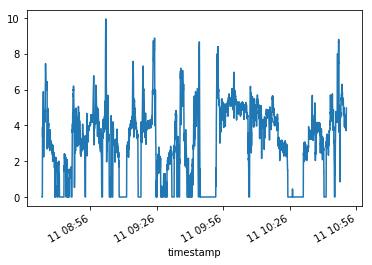

In [19]:
df['speed'].dropna().plot()

In [20]:
s = df['speed']
s[s!=0].mean() * 3.6, s.mean() * 3.6

(14.139115170570667, 10.858253241579138)

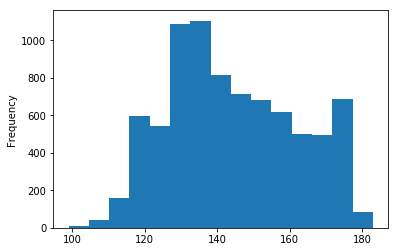

In [21]:
df['heart_rate'].plot.hist(bins=15)

In [55]:
route = df[['position_lat', 'position_long', 'position_lat']] * 180 / 2**31

In [56]:
route.mean()

position_lat     50.861858
position_long     4.631486
position_lat     50.861858
dtype: float64

In [49]:
from bokeh.io import output_file, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, Range1d, PanTool, WheelZoomTool, BoxSelectTool
)

map_options = GMapOptions(lat=50.861858, lng=4.631486, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=Range1d(), y_range=Range1d(), map_options=map_options
)

source = ColumnDataSource(
    data=route
)

circle = Circle(x="position_long", y="position_lat", size=15, fill_color="blue", fill_alpha=0.8, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
# output_file("gmap_plot.html")
show(plot)

E-1005 (MISSING_GOOGLE_API_KEY): Google now requires API keys for all Google Maps usage: GMapPlot(id='16245a2f-a2d8-440d-94e2-378d300a0125', ...)


In [55]:
route

,position_long,position_lat
timestamp,,
2018-03-11 08:34:16,4.626938,50.864080
2018-03-11 08:34:17,4.626937,50.864081
2018-03-11 08:34:18,4.626937,50.864081
2018-03-11 08:34:19,4.626938,50.864081
2018-03-11 08:34:20,4.626937,50.864081
2018-03-11 08:34:21,4.626938,50.864081
2018-03-11 08:34:22,4.626938,50.864081
2018-03-11 08:34:23,4.626938,50.864081
2018-03-11 08:34:24,4.626938,50.864081


In [24]:
alt.enable_mime_rendering()

In [25]:
alt.Chart(route, max_rows=10000).mark_point().encode(
    x='position_lat',
    y='position_long',
)

<altair.VegaLite object>

In [71]:

m = folium.Map(
    location=[50.861858, 4.631486],
    zoom_start=13,
#     tiles='Bertem',
    tiles='http://toolserver.org/tiles/hikebike/{z}/{x}/{y}.png',
#     tiles='http://a.tile.thunderforest.com/outdoors/{z}/{x}/{y}.png',
#     tiles='http://a.tile.opencyclemap.org/cycle/{z}/{x}/{y}.png',
    attr='My Data Attribution',
)
m

In [70]:
folium.PolyLine(list(map(list, route.values))).add_to(m)
m

In [50]:
m

In [72]:
f.close()

In [73]:
d

defaultdict(list,
            {'activity': [<DataMessage: activity (#34) -- local mesg: #8, fields: [timestamp: 2018-03-11 10:51:40, total_timer_time: 8241.0, local_timestamp: None, num_sessions: 1, type: manual, event: activity, event_type: stop, event_group: None]>],
             'device_info': [<DataMessage: device_info (#23) -- local mesg: #3, fields: [timestamp: 2018-03-11 08:34:15, serial_number: None, cum_operating_time: None, product_name: Macro GPS, manufacturer: lezyne, product: 5, software_version: 15.93, battery_voltage: 3.98828125, device_index: 5, device_type: 2, hardware_version: None]>,
              <DataMessage: device_info (#23) -- local mesg: #3, fields: [timestamp: 2018-03-11 08:34:15, serial_number: None, cum_operating_time: None, product_name: None, manufacturer: None, product: None, software_version: None, battery_voltage: None, device_index: 1, device_type: environment_sensor_legacy, hardware_version: None]>,
              <DataMessage: device_info (#23) -- loc